# Credit Card Fraud Detection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [2]:
data=pd.read_csv("C:\\Users\\rajjv\\Downloads\\archive\\creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [4]:
data.shape

(284807, 31)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [8]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [9]:
#distribution of legit transaction and fraudulent transaction
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

<Axes: xlabel='Class', ylabel='count'>

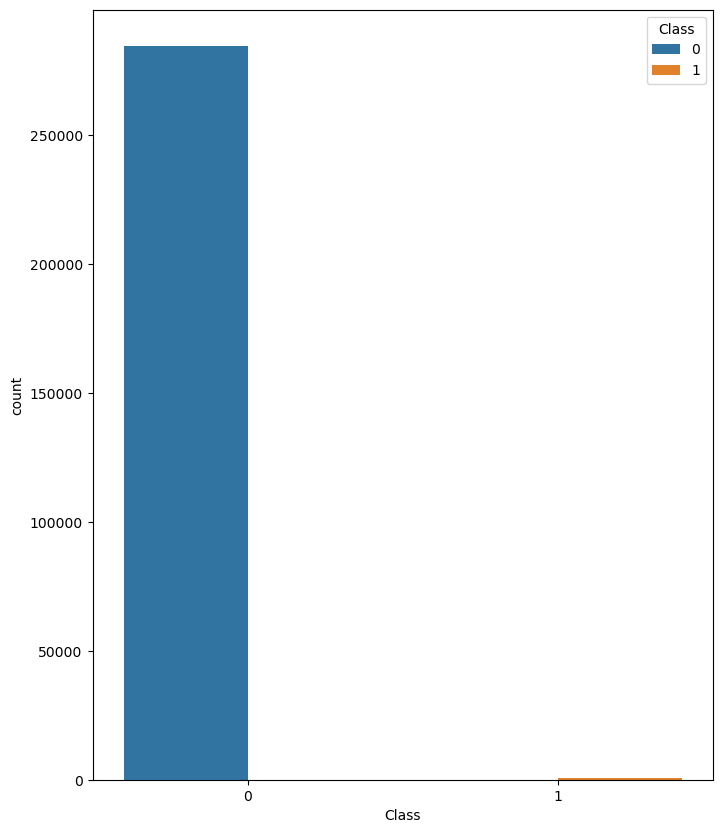

In [10]:
plt.figure(figsize=(8,10))
sns.countplot(x='Class',hue='Class',data=data)

This dataset is highly unbalanced

0---> Normal Transaction
<br>
1---> Fraudulent Transaction

In [11]:
#spreading the data for analysis
legit=data[data.Class==0]
fraud=data[data.Class==1]

In [12]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [13]:
#statistical measures of the data
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [14]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [15]:
#compare the value for both transaction
data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Under Sampling

Build a sample dataset containing similar distribution of normal and fraudulent transactions 

Number of Fraudulent Transactions-->492

In [16]:
legit_sample=legit.sample(n=492)

In [17]:
#Concatinating two data frames
new_dataset=pd.concat([legit_sample,fraud],axis=0)


In [18]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
196449,131513.0,-0.961038,-1.416382,1.325243,-0.881541,-0.644295,-0.572734,-0.121457,-0.005858,-0.941126,...,0.672210,1.343567,0.411275,0.007340,-0.219212,0.095760,0.076338,0.186411,224.00,0
7113,9321.0,-1.341749,0.651713,2.262927,0.764299,-0.015041,0.234485,-0.128733,0.204801,1.882654,...,-0.281242,-0.081653,-0.159867,0.087973,0.378023,0.664810,0.208161,0.302716,0.01,0
53530,46026.0,0.118156,2.105628,-2.857202,1.188042,1.519795,-0.181211,0.136153,-0.325560,-0.615698,...,0.671943,-0.426786,0.106056,-1.693470,-0.335225,-0.310113,0.042987,-0.068150,1.29,0
182776,125544.0,-0.947013,-0.769388,-0.099135,0.615050,-0.326349,1.339084,-0.465960,-2.632728,-2.037082,...,-1.461248,-0.612479,-0.735656,0.268053,1.599752,-0.283618,-0.034670,0.238914,443.42,0
9591,14426.0,1.147943,-0.080435,0.956027,0.207417,-0.678413,-0.160707,-0.605327,0.062210,1.441241,...,0.027084,0.344491,0.026099,0.244295,0.080984,1.030599,-0.075480,-0.005637,14.95,0


In [19]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [20]:
print("Value count: total number of 0 and 1's")
new_dataset['Class'].value_counts()

Value count: total number of 0 and 1's


0    492
1    492
Name: Class, dtype: int64

<Axes: xlabel='Class', ylabel='count'>

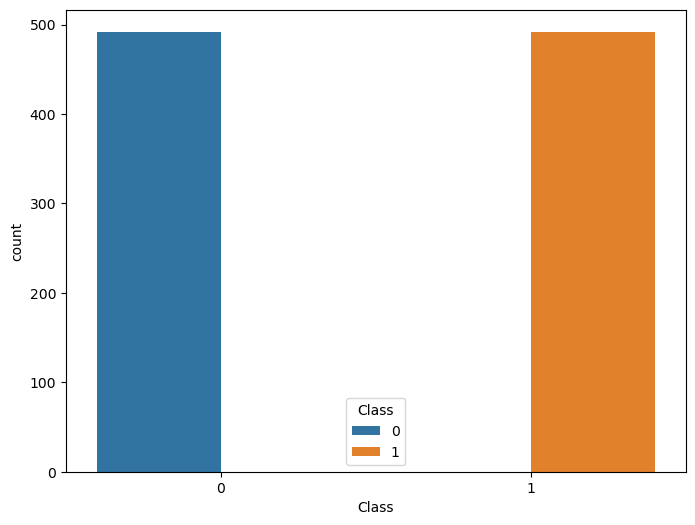

In [21]:
#plotting the total number of 0(legit) and 1(fraud) value 
plt.figure(figsize=(8,6))
sns.countplot(x='Class',hue='Class',data=new_dataset)

In [22]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94654.463415,-0.164534,0.073422,0.087866,0.125517,-0.036390,-0.037521,0.021512,-0.034996,0.066579,...,-0.000403,-0.018064,-0.006538,-0.017607,-0.015694,0.018133,-0.026906,-0.020919,0.008219,91.421545
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Split the data into feature and target

In [23]:
X=new_dataset.drop(columns='Class',axis=1)
y=new_dataset['Class']

In [24]:
print(X.shape)

(984, 30)


In [25]:
print(y)

196449    0
7113      0
53530     0
182776    0
9591      0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


In [26]:
#Split the data into training and testing
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)

In [27]:
print(X_train)

            Time         V1         V2         V3        V4         V5  \
211823  138585.0  -3.482264   0.544375   1.717129  2.165167   1.237379   
284644  172635.0  -1.341233   1.154403  -0.537754 -0.497294   0.078345   
56703    47545.0   1.176716   0.557091  -0.490800  0.756424   0.249192   
150684   93888.0 -10.040631   6.139183 -12.972972  7.740555  -8.684705   
6882      8808.0  -4.617217   1.695694  -3.114372  4.328199  -1.873257   
...          ...        ...        ...        ...       ...        ...   
39183    39729.0  -0.964567  -1.643541  -0.187727  1.158253  -2.458336   
134669   80912.0   1.478894  -1.081477   0.408401 -1.287924  -1.639296   
143335   85285.0  -6.713407   3.921104  -9.746678  5.148263  -5.151563   
155406  105338.0   2.008722   0.060819  -1.654125  0.825934   0.224686   
17317    28625.0 -27.848181  15.598193 -28.923756  6.418442 -20.346228   

              V6         V7         V8        V9  ...       V20       V21  \
211823  0.698652   0.433231  -0.29

In [28]:
print(X_test)

            Time        V1        V2        V3        V4        V5        V6  \
230076  146179.0 -0.067672  4.251181 -6.540388  7.283657  0.513541 -2.635066   
262826  160665.0 -0.417340  4.700055 -7.521767  7.671884  0.260821 -2.646693   
127869   78501.0  1.458317 -1.009235 -0.074125 -1.298495 -1.354311 -1.330924   
30314    35866.0 -2.044489  3.368306 -3.937111  5.623120 -3.079232 -1.253474   
203015  134606.0  2.020674  0.141273 -1.595421  0.341551  0.414815 -0.655331   
...          ...       ...       ...       ...       ...       ...       ...   
51826    45140.0 -0.493324  0.694552  1.943072  0.221992 -0.321219 -0.367865   
6472      7740.0  1.023874  2.001485 -4.769752  3.819195 -1.271754 -1.734662   
226582  144703.0 -0.610571 -0.107411 -0.337893 -2.382019  0.380952 -1.071532   
52466    45463.0 -1.476893  2.122314 -1.229470  1.201849 -0.343264 -1.317704   
22031    31994.0  1.067458 -0.015899 -0.677301  0.121359  0.986877  0.972299   

              V7        V8        V9  .

In [29]:
print(y_train)

211823    0
284644    0
56703     1
150684    1
6882      1
         ..
39183     1
134669    0
143335    1
155406    0
17317     1
Name: Class, Length: 787, dtype: int64


In [30]:
print(y_test)

230076    1
262826    1
127869    0
30314     1
203015    0
         ..
51826     0
6472      1
226582    0
52466     1
22031     0
Name: Class, Length: 197, dtype: int64


In [31]:
print("X_train shape is: ",X_train.shape)
print("X_test shape is: ",X_test.shape)
print("y_train shape is: ",y_train.shape)
print("y_test shape is: ",y_test.shape)

X_train shape is:  (787, 30)
X_test shape is:  (197, 30)
y_train shape is:  (787,)
y_test shape is:  (197,)


In [32]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [33]:
#Model Evaluation
#Accuracy Score on training data
X_train_pred=model.predict(X_train)
training_data_accuracy=accuracy_score(X_train_pred,y_train)
print("Training data Accuracy Score : ",training_data_accuracy)

Training data Accuracy Score :  0.9275730622617535


Confusion Matrix is: 
[[97  2]
 [ 5 93]]
Ploting the confusion Matrix--


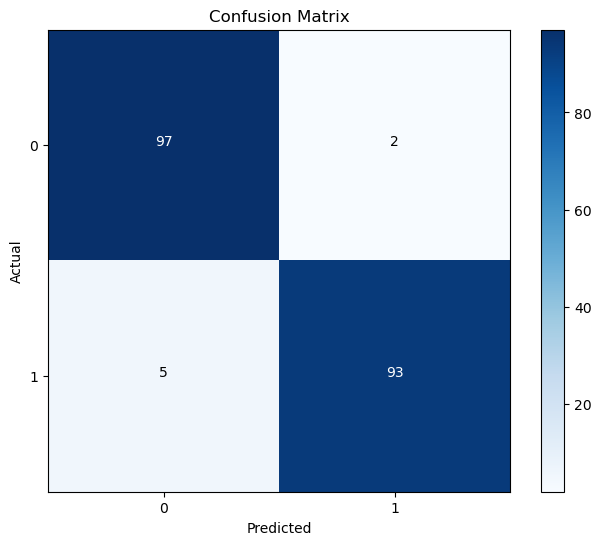

In [34]:
#Confusion Matrix
y_pred=model.predict(X_test)
confusion_mat=confusion_matrix(y_test,y_pred)
print("Confusion Matrix is: ")
print(confusion_mat)
print("Ploting the confusion Matrix--")
#plot the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(confusion_mat, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
tick_marks = [0, 1]
plt.xticks(tick_marks, [0, 1])
plt.yticks(tick_marks, [0, 1])
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(confusion_mat[i, j]), horizontalalignment='center', color='white' if confusion_mat[i, j] > confusion_mat.max() / 2 else 'black')
plt.show()


In [36]:
accuracy_pred=accuracy_score(y_test,y_pred)
print("Accuracy Score: ",accuracy_pred)
print("")
#Classification report
print("******Classification Report*****")
classification_rep=classification_report(y_test,y_pred)
print(classification_rep)

Accuracy Score:  0.9644670050761421

******Classification Report*****
              precision    recall  f1-score   support

           0       0.95      0.98      0.97        99
           1       0.98      0.95      0.96        98

    accuracy                           0.96       197
   macro avg       0.96      0.96      0.96       197
weighted avg       0.96      0.96      0.96       197

